# Pulsations in PHOEBE -- pre-alpha, demonstrably unstable version
## ~ try at home, show no one ~

Do not use for anything serious, please. Only goofy stuff. For real. Like, FOR REAL.

In [1]:
import phoebe
import matplotlib
%matplotlib inline

You'll need the developer mode turned on for this, unless Kyle hacked it for the workshop branch. Kyle?

In [2]:
phoebe.devel_on()
b = phoebe.default_binary()

Let's add two datasets, a light curve and a mesh:

In [3]:
b.add_dataset('lc', times=phoebe.linspace(0, 1, 101), passband='Kepler:mean')
b.add_dataset('mesh', times=phoebe.linspace(0, 1, 101), passband='Kepler:mean')

<ParameterSet: 7 parameters | contexts: compute, dataset, constraint>

Pulsations are "features". To add a pulsation, we need to add a feature to one (or more) of the stars. Each pulsations is parametrized by:

* radial amplitude @radamp (fraction)
* frequency @freq (c/d)
* pulsation numbers @l and @m

There is also a placeholder to provide external temperature map that is not yet implemented; instead, PHOEBE will use gravity darkening to compute temperature profiles.

In [4]:
b.add_feature('pulsation', 'primary', radamp=0.1, freq=5.0, feature='puls01')

<ParameterSet: 5 parameters | qualifiers: l, radamp, teffext, m, freq>

Let's take a look at parameters again, just to remind ourselves that we can add them post-festum:

In [5]:
print(b['puls01'])

ParameterSet: 5 parameters
           radamp@puls01@feature: 0.1
             freq@puls01@feature: 5.0 1 / d
                l@puls01@feature: 0
                m@puls01@feature: 0
          teffext@puls01@feature: False


Now we can compute the model and plot it (warning, this will take a significant chunk of time):

In [6]:
b.run_compute(irrad_method='none')

<ParameterSet: 812 parameters | kinds: mesh, lc>

(<autofig.figure.Figure | 2 axes | 203 call(s)>,
 <matplotlib.animation.FuncAnimation at 0x7f0d1a403128>)

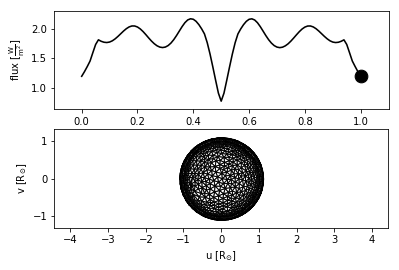

In [7]:
b.plot(animate=True, save='anim.gif', save_kwargs={'writer': 'imagemagick'})

![title](puls1.anim.gif)

We can now add another pulsation on the secondary star and recompute/replot the model:

In [10]:
b.add_feature('pulsation', 'secondary', l=2, m=1, freq=4.0, radamp=0.15, feature='puls02', overwrite=True)

<ParameterSet: 5 parameters | qualifiers: l, radamp, teffext, m, freq>

In [11]:
b.run_compute(irrad_method='none')

<ParameterSet: 812 parameters | kinds: mesh, lc>

(<autofig.figure.Figure | 2 axes | 203 call(s)>,
 <matplotlib.animation.FuncAnimation at 0x7f33395314e0>)

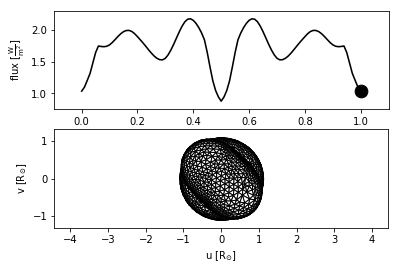

In [12]:
b.plot(animate=True, save='anim2.gif', save_kwargs={'writer': 'imagemagick'})

![title](puls2.anim.gif)